Model Logreg

In [42]:
# 1. Tambah path agar bisa akses folder scripts/
import sys
sys.path.append('../scripts/')

# 2. Import library & fungsi dari scripts
import pandas as pd
from preprocesing import load_dataset, make_target, drop_useless_columns, encode_and_scale
from modelling import train_logreg, evaluate_model, save_model
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 3. Load & proses data
df = load_dataset('../data/loan_data_2007_2014.csv')
df = make_target(df)
df = drop_useless_columns(df)
df = encode_and_scale(df)

# 4. Pisahkan fitur & label
X = df.drop('target', axis=1)
y = df['target']

# 5. Imputasi NaN langsung semua kolom, tanpa gunakan X.columns
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed_array)  # Tidak pakai columns=X.columns

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 7. Train & evaluate logistic regression
logreg = train_logreg(X_train, y_train)
evaluate_model(logreg, X_test, y_test)
save_model(logreg, '../output/model_logreg.pkl')

print("✅ Logistic Regression model berhasil dibuat dan disimpan!")


e:\Learn\Intrenship Based Project\Final Task\credit-risk-prediction\notebooks\../scripts\preprocesing.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  def load_dataset(path):
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarni

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     36906
           1       0.95      0.88      0.92     56351

    accuracy                           0.90     93257
   macro avg       0.89      0.91      0.90     93257
weighted avg       0.91      0.90      0.90     93257

ROC-AUC: 0.9527548107090341
✅ Logistic Regression model berhasil dibuat dan disimpan!


Model RF

In [48]:

# 1. Tambah path agar bisa akses folder scripts/
import sys
sys.path.append('../scripts/')



# 2. Import fungsi dari scripts
from preprocesing import load_dataset, make_target, drop_useless_columns, encode_and_scale
from modelling import train_logreg, train_rf, evaluate_model, save_model

# 3. Load & proses data
df = load_dataset('../data/loan_data_2007_2014.csv')
df = make_target(df)
df = drop_useless_columns(df)
df = encode_and_scale(df)

# 4. Split data
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train & evaluate
rf = train_rf(X_train, y_train)
evaluate_model(rf, X_test, y_test)
save_model(rf, '../output/model_rf.pkl')


e:\Learn\Intrenship Based Project\Final Task\credit-risk-prediction\notebooks\../scripts\preprocesing.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  def load_dataset(path):
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\INFINIX USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36906
           1       1.00      1.00      1.00     56351

    accuracy                           1.00     93257
   macro avg       1.00      1.00      1.00     93257
weighted avg       1.00      1.00      1.00     93257

ROC-AUC: 0.9999858664032066


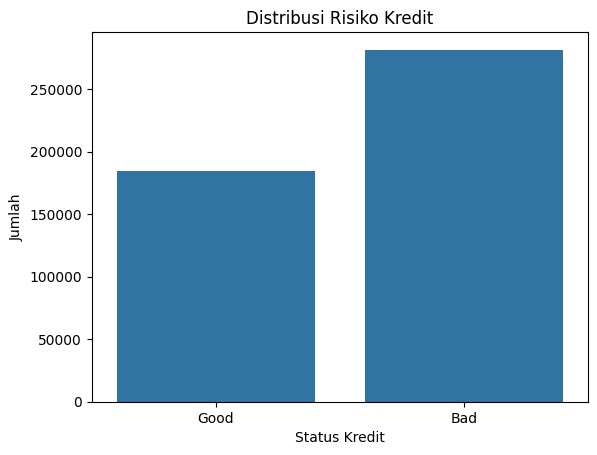

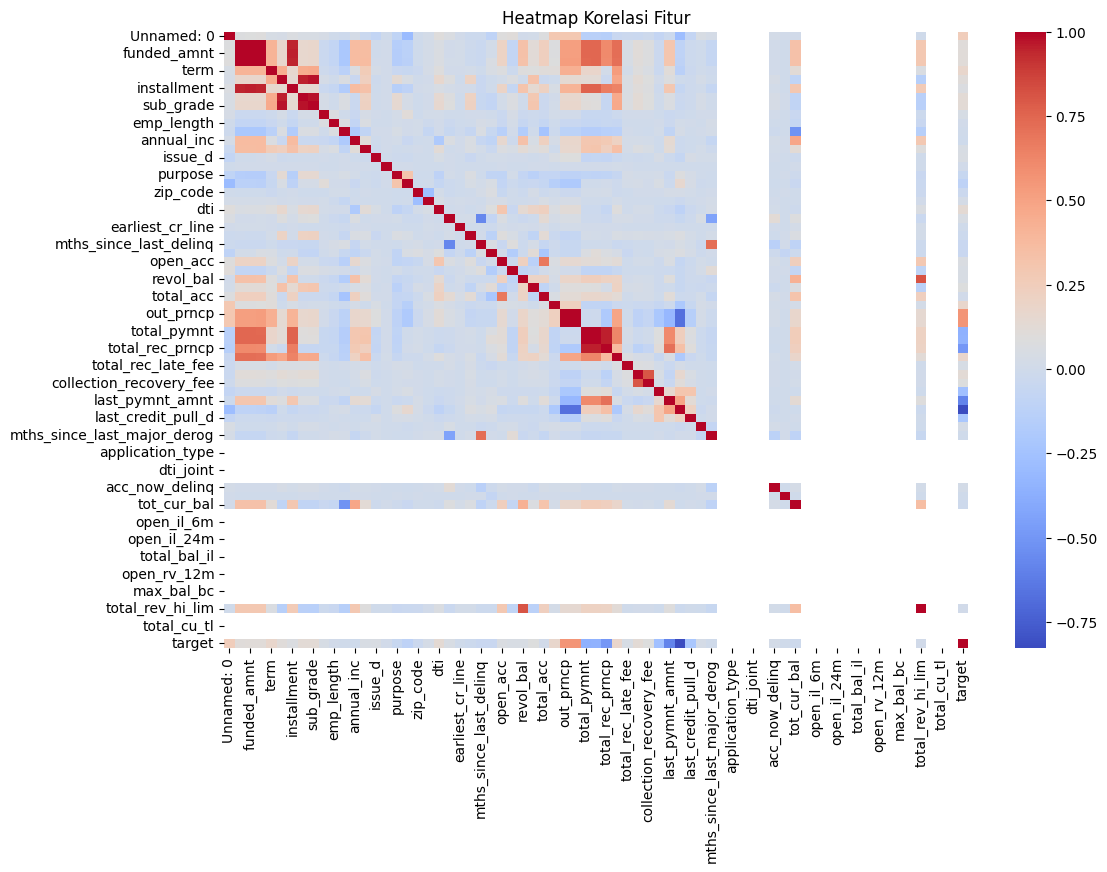

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Menyalin dataframe biar tidak ubah aslinya
df_plot = df.copy()
df_plot['target'] = df_plot['target'].map({0: 'Good', 1: 'Bad'})

# Plot distribusi
sns.countplot(x='target', data=df_plot)
plt.title("Distribusi Risiko Kredit")
plt.xlabel("Status Kredit")
plt.ylabel("Jumlah")
plt.savefig("../output/distribusi_resiko_kredit.png")
plt.show()


# Korelasi numerik
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Heatmap Korelasi Fitur")
plt.savefig("../output/heatmap_korelasi.png")
plt.show()


Simpan Visualisasi ROC Curve

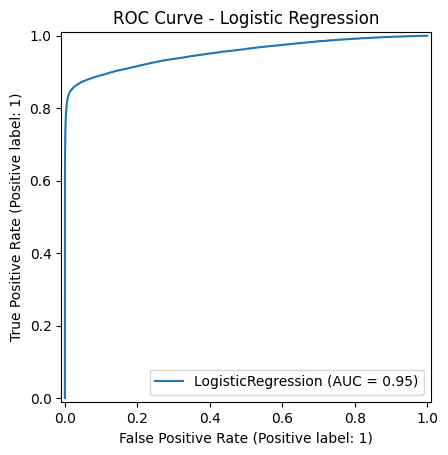

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.savefig("../output/roc_curve_logreg.png")
plt.show()


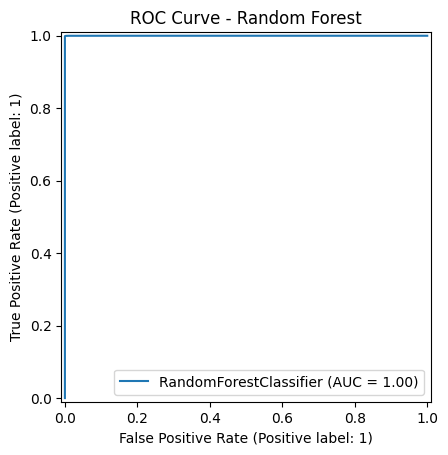

In [49]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# ROC Curve untuk Random Forest
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.savefig("../output/roc_curve_rf.png")
plt.show()


Import & Setup GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

# Buat parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# Setup GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

# Jalankan pencarian parameter terbaik
grid_rf.fit(X_train, y_train)

# Simpan model terbaik
best_rf = grid_rf.best_estimator_
print("Best Params:", grid_rf.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


 Evaluasi Model Terbaik (Random Forest)

In [53]:
from modelling import evaluate_model

# Evaluasi model hasil GridSearch
evaluate_model(best_rf, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36906
           1       1.00      1.00      1.00     56351

    accuracy                           1.00     93257
   macro avg       1.00      1.00      1.00     93257
weighted avg       1.00      1.00      1.00     93257

ROC-AUC: 0.9999918672975534


ROC Curve dari Model Terbaik RF

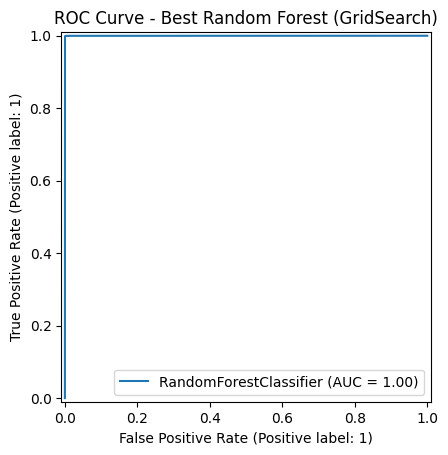

In [56]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
plt.title("ROC Curve - Best Random Forest (GridSearch)")
plt.savefig("../output/roc_curve_rf_best.png")
plt.show()

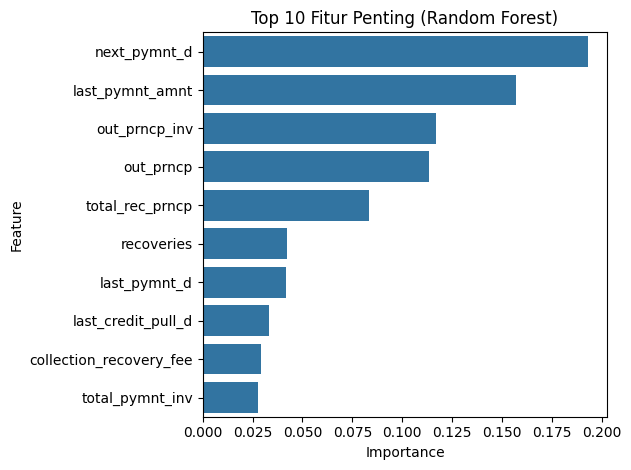

In [57]:
import pandas as pd
import seaborn as sns

# Ambil 10 fitur terpenting
importances = best_rf.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Top 10 Fitur Penting (Random Forest)")
plt.tight_layout()
plt.savefig("../output/feature_importance_rf.png")
plt.show()
